<table class="table table-bordered">
    <tr>
    <th style="text-align:center;"><font size="4"> <br/>COR1305- Modelling And Data Analytics <br />Classification</font></th>
    </tr>
</table> 

### Objective of the study
Use the classification techniques on the Iris dataset to be able to `classify` and `predict` the species.

### What is covered in the notebook:

 1. Reading <b>Iris</b> data from the web into a Pandas `DataFrame`
 2. Inspect the data and basic properties (EDA)
 3. Use Sample plots to show the relationship between variables
 4. Fit a DecisionTreeClassifier from `sklearn` library
 5. Visualise the `decision tree` splitting rules
 6. Printing `accuracy`, `confusion matrix`, and `classification report`.


### Import the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Read data from URL into local storage

In [2]:
data = pd.read_excel('HDBResaleFlatPrices.xlsx')

In [3]:
# printing the top and last few rows from the DataFrame
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Buy
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,Yes
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,Yes
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,No
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,Yes
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,Yes


In [4]:
data.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Buy
869995,2025-04,YISHUN,EXECUTIVE,828,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,975000.0,No
869996,2025-05,YISHUN,EXECUTIVE,828,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,1000000.0,No
869997,2025-07,YISHUN,EXECUTIVE,824,YISHUN ST 81,04 TO 06,146.0,Maisonette,1987,980000.0,No
869998,2025-05,YISHUN,MULTI GENERATION,632,YISHUN ST 61,04 TO 06,147.0,Multi Generation,1987,945000.0,Yes
869999,2025-07,YISHUN,MULTI GENERATION,633,YISHUN ST 61,01 TO 03,171.0,Multi Generation,1987,1095000.0,No


### 2. EDA

### Checking for basic descriptive characteristics and missing values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870000 entries, 0 to 869999
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                870000 non-null  object 
 1   town                 870000 non-null  object 
 2   flat_type            870000 non-null  object 
 3   block                870000 non-null  object 
 4   street_name          870000 non-null  object 
 5   storey_range         870000 non-null  object 
 6   floor_area_sqm       870000 non-null  float64
 7   flat_model           870000 non-null  object 
 8   lease_commence_date  870000 non-null  int64  
 9   resale_price         870000 non-null  float64
 10  Buy                  870000 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 73.0+ MB


### View Summary Statistics

In [6]:
# Summary Statistics
print(data.describe())

       floor_area_sqm  lease_commence_date  resale_price
count   870000.000000        870000.000000  8.700000e+05
mean        95.671336          1988.625311  3.316467e+05
std         25.767263            11.003096  1.809129e+05
min         28.000000          1966.000000  5.000000e+03
25%         73.000000          1981.000000  1.980000e+05
50%         93.000000          1986.000000  3.050000e+05
75%        113.000000          1996.000000  4.300000e+05
max        366.700000          2022.000000  1.658888e+06


### Print the unique values for the `class` categorical variable

In [7]:
print(data['Buy'].unique())

['Yes' 'No']


### Print the frequency counts for the categorical variable : class

In [8]:
print(data['Buy'].value_counts())

Buy
No     435138
Yes    434862
Name: count, dtype: int64


### 3. Let us study the relationship among variables with some visualisations
### a) Scatter plot of Petal Length vs Petal Width

### Think!

<b> Which variables do you think differentiate the species better? </b>

### 4. Fitting the Decision tree
 - Import the sklearn library to instantiate a classifier object
 - Split the dataset into train and test
 - Fit the model and make test predictions
 - Print accuracy score
 - Print confusion matrix



https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [9]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split functions
from sklearn.model_selection import train_test_split

# Import accuracy_score
from sklearn.metrics import accuracy_score

In [10]:
data.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'Buy'],
      dtype='object')

In [11]:
df_dummies = pd.get_dummies(data, columns=['town', 'flat_type', 'storey_range','flat_model'])

In [12]:
df_dummies.columns


Index(['month', 'block', 'street_name', 'floor_area_sqm',
       'lease_commence_date', 'resale_price', 'Buy', 'town_ANG MO KIO',
       'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH',
       'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA',
       'town_CHOA CHU KANG', 'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG',
       'town_JURONG EAST', 'town_JURONG WEST', 'town_KALLANG/WHAMPOA',
       'town_LIM CHU KANG', 'town_MARINE PARADE', 'town_PASIR RIS',
       'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG',
       'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS',
       'town_YISHUN', 'flat_type_1 ROOM', 'flat_type_2 ROOM',
       'flat_type_3 ROOM', 'flat_type_4 ROOM', 'flat_type_5 ROOM',
       'flat_type_EXECUTIVE', 'flat_type_MULTI GENERATION',
       'storey_range_01 TO 03', 'storey_range_01 TO 05',
       'storey_range_04 TO 06', 'storey_range_06 TO 10',
       'storey_range_07 TO 09', 'storey_range_10 

In [13]:
X = df_dummies[['floor_area_sqm', 'lease_commence_date', 'resale_price'] + 
               [col for col in df_dummies.columns if col.startswith('town_') or 
                                                    col.startswith('flat_type_') or 
                                                    col.startswith('flat_model_') or 
                                                    col.startswith('storey_range_')]]

In [14]:
# Get the predictors and target the X and y variables from the dataset
y = data['Buy']

In [15]:
X.columns

Index(['floor_area_sqm', 'lease_commence_date', 'resale_price',
       'town_ANG MO KIO', 'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK',
       'town_BUKIT MERAH', 'town_BUKIT PANJANG', 'town_BUKIT TIMAH',
       'town_CENTRAL AREA', 'town_CHOA CHU KANG', 'town_CLEMENTI',
       'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST',
       'town_KALLANG/WHAMPOA', 'town_LIM CHU KANG', 'town_MARINE PARADE',
       'town_PASIR RIS', 'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG',
       'town_SENGKANG', 'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH',
       'town_WOODLANDS', 'town_YISHUN', 'flat_type_1 ROOM', 'flat_type_2 ROOM',
       'flat_type_3 ROOM', 'flat_type_4 ROOM', 'flat_type_5 ROOM',
       'flat_type_EXECUTIVE', 'flat_type_MULTI GENERATION',
       'storey_range_01 TO 03', 'storey_range_01 TO 05',
       'storey_range_04 TO 06', 'storey_range_06 TO 10',
       'storey_range_07 TO 09', 'storey_range_10 TO 12',
       'storey_range_11 TO 15', 'storey

In [16]:
# Split dataset into 80% train, 20% test

# For classification, it is important to stratify the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                          stratify = y,
                                                          random_state = 1)

# Note: stratify : data is split in stratified fashion (stratified sampling)
#"stratify = y" ensures the class distribution in y in the train and test sets remains the same as in the original dataset.

In [17]:
# print sample of X_train
X_train.head()

,floor_area_sqm,lease_commence_date,resale_price,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,...,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_SIMPLIFIED,flat_model_STANDARD,flat_model_Simplified,flat_model_Standard,flat_model_TERRACE,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
230127,67.0,1984,125000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
438775,74.0,1985,153000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
351968,64.0,1989,148000.0,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
264045,104.0,1985,288000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
822803,93.0,2004,510000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
# print sample of y_train
y_train.head()

230127     No
438775     No
351968     No
264045    Yes
822803     No
Name: Buy, dtype: object

In [19]:
# print size of X_train
X_train.shape

(696000, 96)

In [20]:
# print size of y_train
y_train.shape

(696000,)

In [21]:
# print size of X_test
X_test.shape

(174000, 96)

Train a Decision Tree Classifier using `entropy` as the criterion, `max_depth = 3` and use `random_state = 1`.

`DecisionTreeClassifier` API: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [40]:
# Instantiate a decision tree dt and criterion

dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 69)


Check out the functions in the API

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [41]:
# Fit dt to the training set
dt.fit(X_train, y_train) 


,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,69
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [42]:
# Predict test set labels
y_pred = dt.predict(X_test)

In [43]:
# print y_pred
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'],
      shape=(174000,), dtype=object)

Next, we create a new DataFrame `result_df` that combines the variables (features) with the model's predicted class labels. It allows for an easy, side-by-side view of the test inputs and their corresponding predicted outputs, which is useful for evaluating and interpreting the model’s performance.

In [44]:
result_df = X_test.copy()

result_df = pd.concat([result_df, pd.DataFrame(y_pred, columns =['Buy'])], axis=1, join = "inner")
result_df

,floor_area_sqm,lease_commence_date,resale_price,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,...,flat_model_Premium Maisonette,flat_model_SIMPLIFIED,flat_model_STANDARD,flat_model_Simplified,flat_model_Standard,flat_model_TERRACE,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,Buy
127571,103.0,1988,317000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,No
89581,120.0,1977,393000.0,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,No
162441,106.0,1992,288000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,No
132677,64.0,1992,175000.0,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,No
142673,135.0,1992,550000.0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109851,67.0,1978,185000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,No
160146,74.0,1987,195000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,No
126416,103.0,1991,317000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,No
124775,97.0,1977,350000.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,No


### 5. Visualising the Decision Tree

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree

Using the Scikit-Learn tree module, we make use of the __export_text__ and __plot_tree__ functions to visualize the tree. 

In [45]:
from sklearn import tree

In [46]:
text_representation = tree.export_text(dt, feature_names=X_train.columns)
print(text_representation)

|--- flat_model_2-room <= 0.50
|   |--- floor_area_sqm <= 47.50
|   |   |--- resale_price <= 501500.00
|   |   |   |--- class: No
|   |   |--- resale_price >  501500.00
|   |   |   |--- class: No
|   |--- floor_area_sqm >  47.50
|   |   |--- resale_price <= 1495000.00
|   |   |   |--- class: No
|   |   |--- resale_price >  1495000.00
|   |   |   |--- class: No
|--- flat_model_2-room >  0.50
|   |--- resale_price <= 138000.00
|   |   |--- class: No
|   |--- resale_price >  138000.00
|   |   |--- resale_price <= 380444.00
|   |   |   |--- class: Yes
|   |   |--- resale_price >  380444.00
|   |   |   |--- class: No



In [47]:
dt.classes_

array(['No', 'Yes'], dtype=object)

In [48]:
feature_cols = dt.feature_names_in_
feature_cols

array(['floor_area_sqm', 'lease_commence_date', 'resale_price',
       'town_ANG MO KIO', 'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK',
       'town_BUKIT MERAH', 'town_BUKIT PANJANG', 'town_BUKIT TIMAH',
       'town_CENTRAL AREA', 'town_CHOA CHU KANG', 'town_CLEMENTI',
       'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST',
       'town_JURONG WEST', 'town_KALLANG/WHAMPOA', 'town_LIM CHU KANG',
       'town_MARINE PARADE', 'town_PASIR RIS', 'town_PUNGGOL',
       'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG',
       'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH',
       'town_WOODLANDS', 'town_YISHUN', 'flat_type_1 ROOM',
       'flat_type_2 ROOM', 'flat_type_3 ROOM', 'flat_type_4 ROOM',
       'flat_type_5 ROOM', 'flat_type_EXECUTIVE',
       'flat_type_MULTI GENERATION', 'storey_range_01 TO 03',
       'storey_range_01 TO 05', 'storey_range_04 TO 06',
       'storey_range_06 TO 10', 'storey_range_07 TO 09',
       'storey_range_10 TO 12', 'storey_range_11 TO 15',


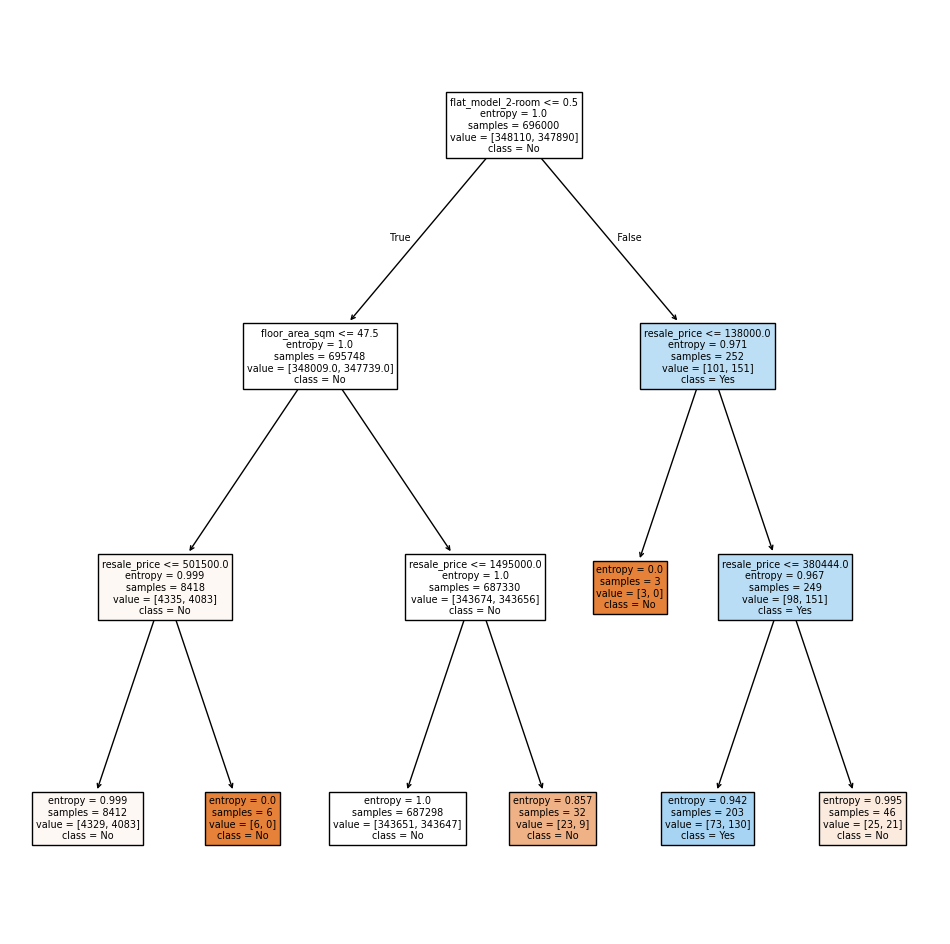

In [57]:
fig = plt.figure(figsize=(12,12))
dt_tree = tree.plot_tree(dt, 
                   feature_names=feature_cols,  
                   class_names= dt.classes_,
                   filled=True)

### 6. Accuracy, Confusion Matrix and Classification Report

### a) Printing the Prediction Accuracy
<b>In classification Accuracy is calculated as the (sum of correct predictions / total number of predictions) <b/>

In [50]:
# Print the accuracy of labels predicted.
accuracy = accuracy_score(y_test, y_pred)
round(accuracy,2)

0.5

### b) Printing the Confusion Matrix

The confusion Matrix is simply a square matrix that reports the counts of <b>`true positive, true negative, false positive and false negative`</b> predictions of a classifier.

https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix

In [51]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred, labels = [ 'Yes', 'No'])
print(cnf_matrix)

[[   24 86948]
 [   20 87008]]


In [52]:
confusion_test_df = pd.DataFrame(cnf_matrix, columns = [ 'Yes_pred', 'No_pred']\
                      , index =  [ 'Yes_act', 'No_act'])
confusion_test_df

,Yes_pred,No_pred
Yes_act,24,86948
No_act,20,87008


### c) Printing the Classification Report

In [53]:
from sklearn.metrics import classification_report

class_labels = data['Buy'].unique()
print(classification_report(y_test, y_pred, target_names=class_labels))

              precision    recall  f1-score   support

         Yes       0.50      1.00      0.67     87028
          No       0.55      0.00      0.00     86972

    accuracy                           0.50    174000
   macro avg       0.52      0.50      0.33    174000
weighted avg       0.52      0.50      0.33    174000



### Variable Importance <br>
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. 

In [54]:
#print the feature importance using the feature_importances_ attribute from the dt model
vi = dt.feature_importances_

print(vi)

[0.17503428 0.         0.58920742 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.2357583  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


In [55]:
#Format the feature importance output here
n = len(feature_cols)
for i in range(0,n):
    print(feature_cols[i] + '   :',vi[i].round(3))

floor_area_sqm   : 0.175
lease_commence_date   : 0.0
resale_price   : 0.589
town_ANG MO KIO   : 0.0
town_BEDOK   : 0.0
town_BISHAN   : 0.0
town_BUKIT BATOK   : 0.0
town_BUKIT MERAH   : 0.0
town_BUKIT PANJANG   : 0.0
town_BUKIT TIMAH   : 0.0
town_CENTRAL AREA   : 0.0
town_CHOA CHU KANG   : 0.0
town_CLEMENTI   : 0.0
town_GEYLANG   : 0.0
town_HOUGANG   : 0.0
town_JURONG EAST   : 0.0
town_JURONG WEST   : 0.0
town_KALLANG/WHAMPOA   : 0.0
town_LIM CHU KANG   : 0.0
town_MARINE PARADE   : 0.0
town_PASIR RIS   : 0.0
town_PUNGGOL   : 0.0
town_QUEENSTOWN   : 0.0
town_SEMBAWANG   : 0.0
town_SENGKANG   : 0.0
town_SERANGOON   : 0.0
town_TAMPINES   : 0.0
town_TOA PAYOH   : 0.0
town_WOODLANDS   : 0.0
town_YISHUN   : 0.0
flat_type_1 ROOM   : 0.0
flat_type_2 ROOM   : 0.0
flat_type_3 ROOM   : 0.0
flat_type_4 ROOM   : 0.0
flat_type_5 ROOM   : 0.0
flat_type_EXECUTIVE   : 0.0
flat_type_MULTI GENERATION   : 0.0
storey_range_01 TO 03   : 0.0
storey_range_01 TO 05   : 0.0
storey_range_04 TO 06   : 0.0
storey_r

**Optional codes - Plotting the Varible/feature importance**

<Axes: >

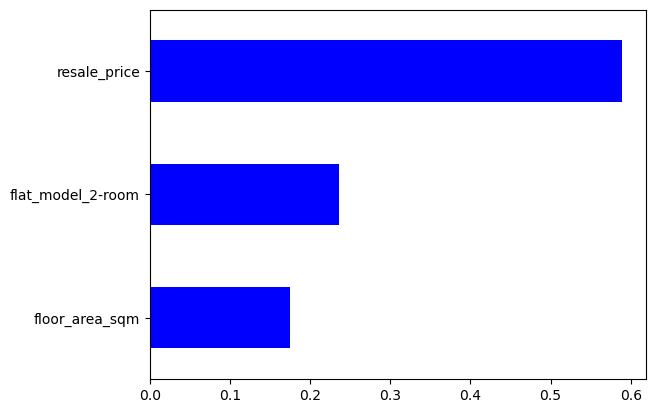

In [56]:
# Create a pandas series(single columns data structure) with features importances for plotting.
# Create a pandas series with feature importances
feat_importances = pd.Series(vi, index=feature_cols)

# Filter out features with zero importance
nonzero_feat_importances = feat_importances[feat_importances != 0]

# Sort
sorted_feat_importances = nonzero_feat_importances.sort_values()

# Make a horizontal bar plot
sorted_feat_importances.plot(kind='barh', color='blue')
